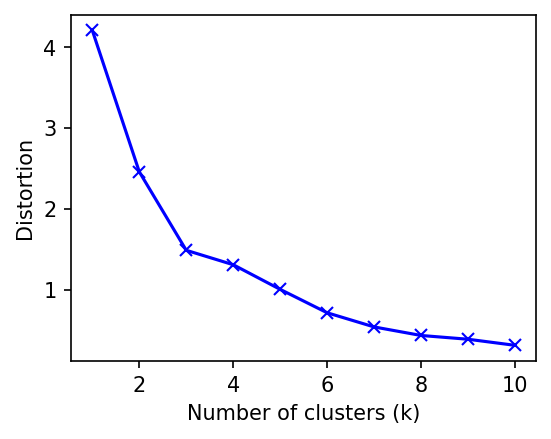

/tmp/ipykernel_545751/229377366.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_3_groups = df.groupby('Cluster_3').apply(
/tmp/ipykernel_545751/229377366.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_4_groups = df.groupby('Cluster_4').apply(


{0: ['Central', 'Oregon', 'Ohio', 'N. Virginia', 'N. California'],
 1: ['Mumbai', 'Sydney', 'Singapore', 'Osaka', 'Hong Kong', 'Tokyo', 'Seoul'],
 2: ['Milan', 'Paris', 'Stockholm', 'Ireland', 'London', 'Frankfurt']}

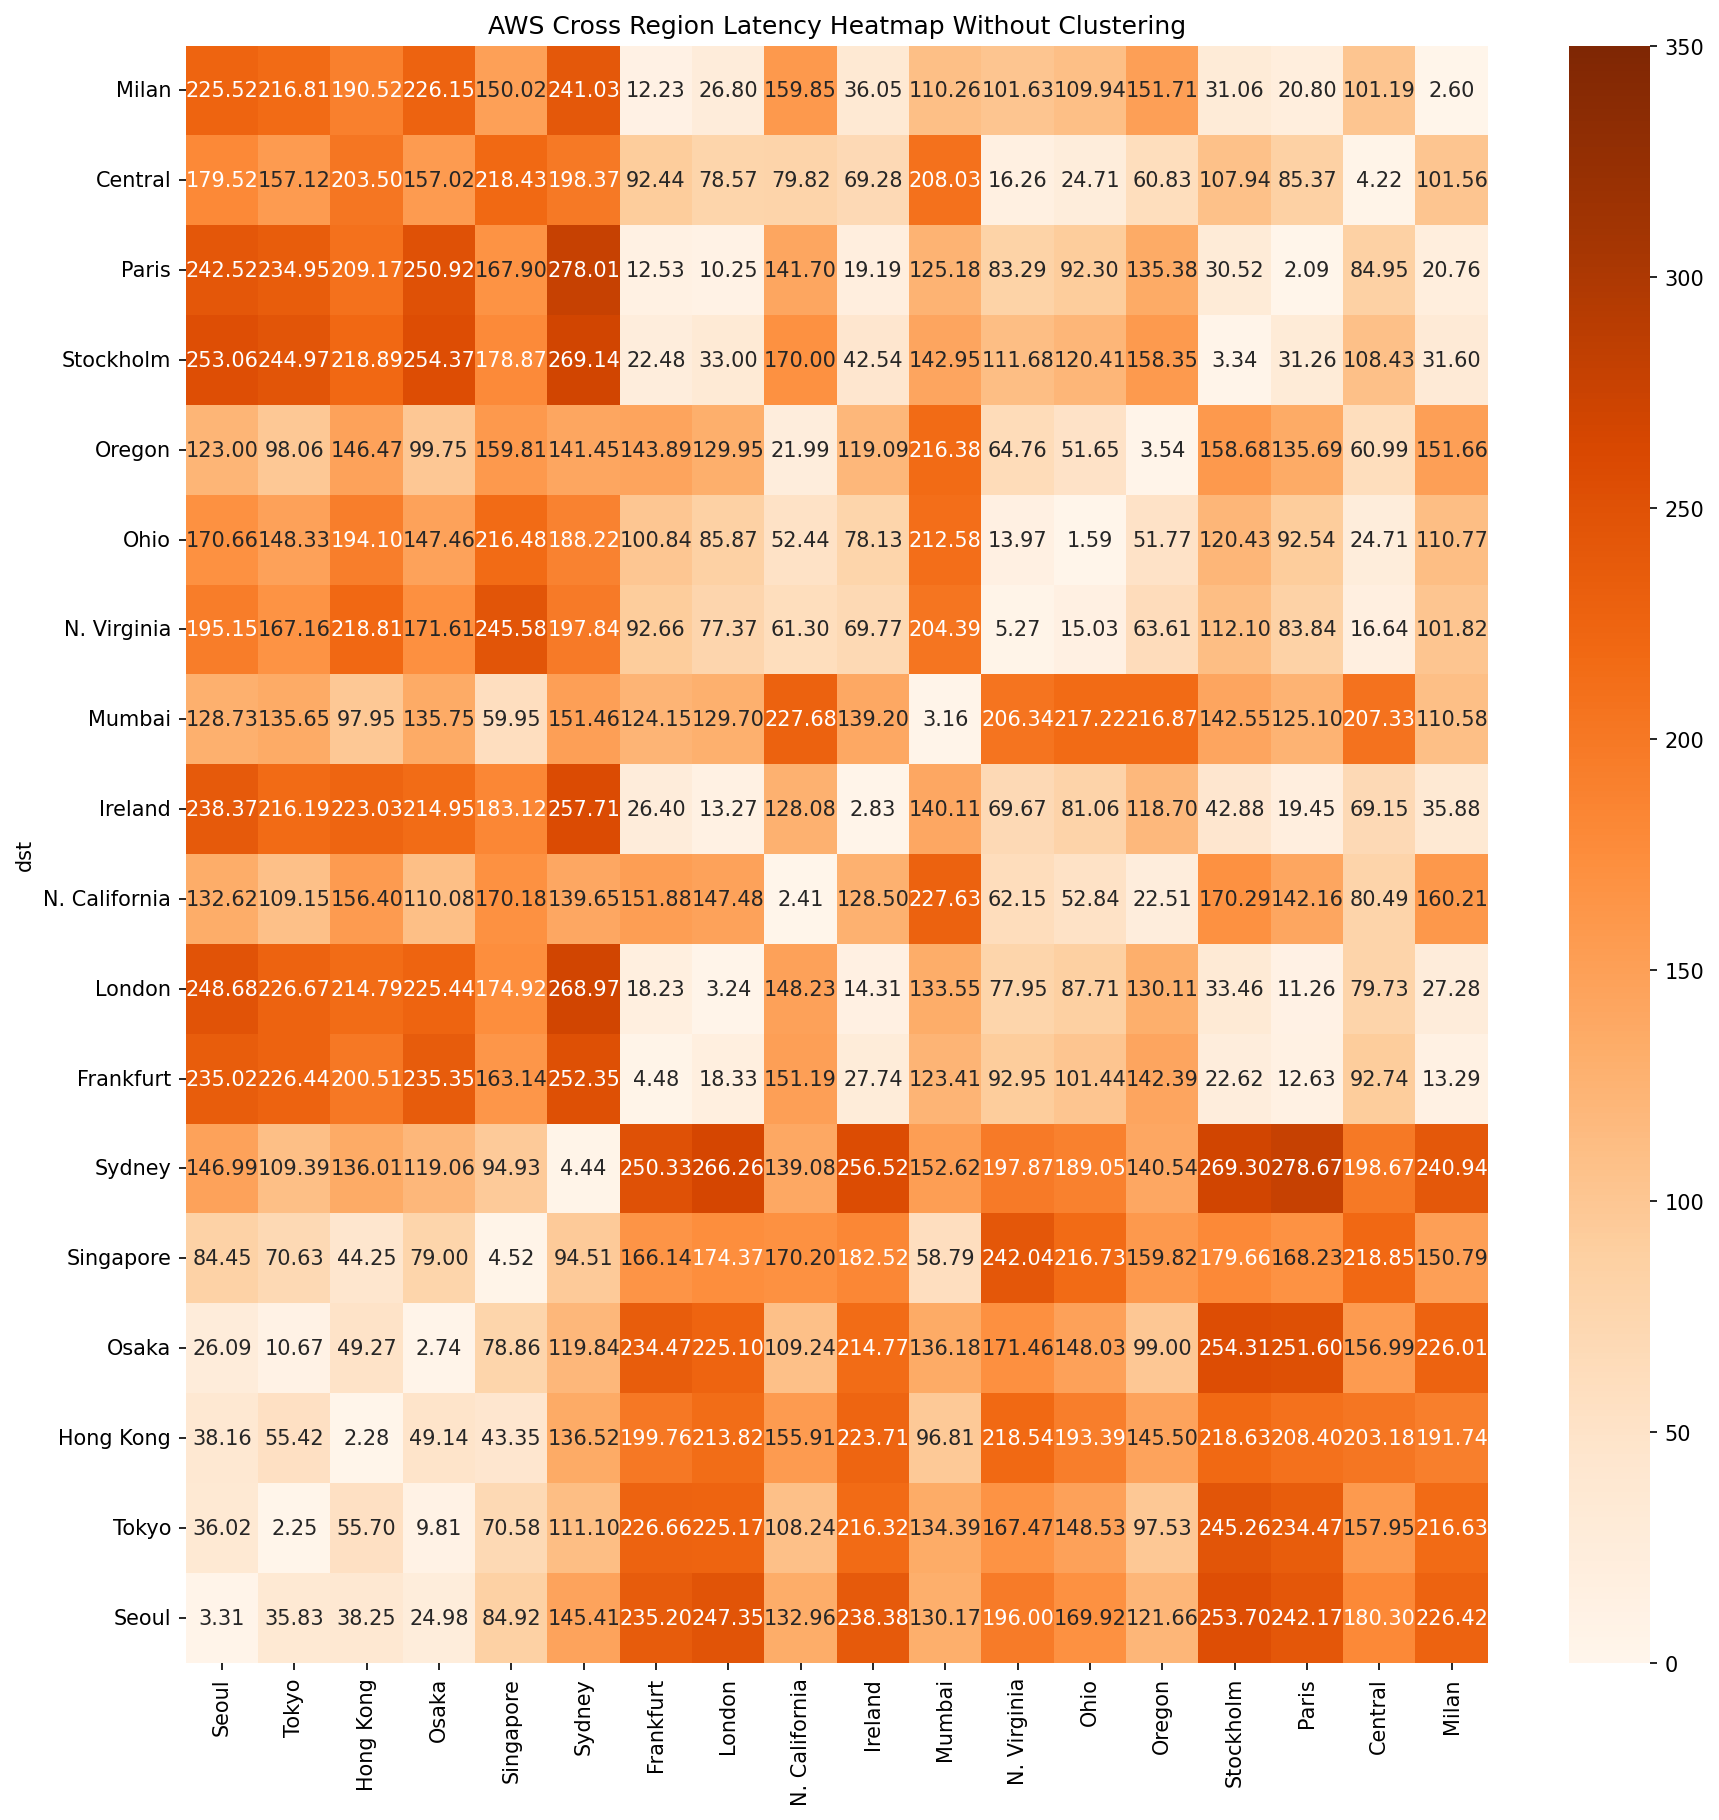

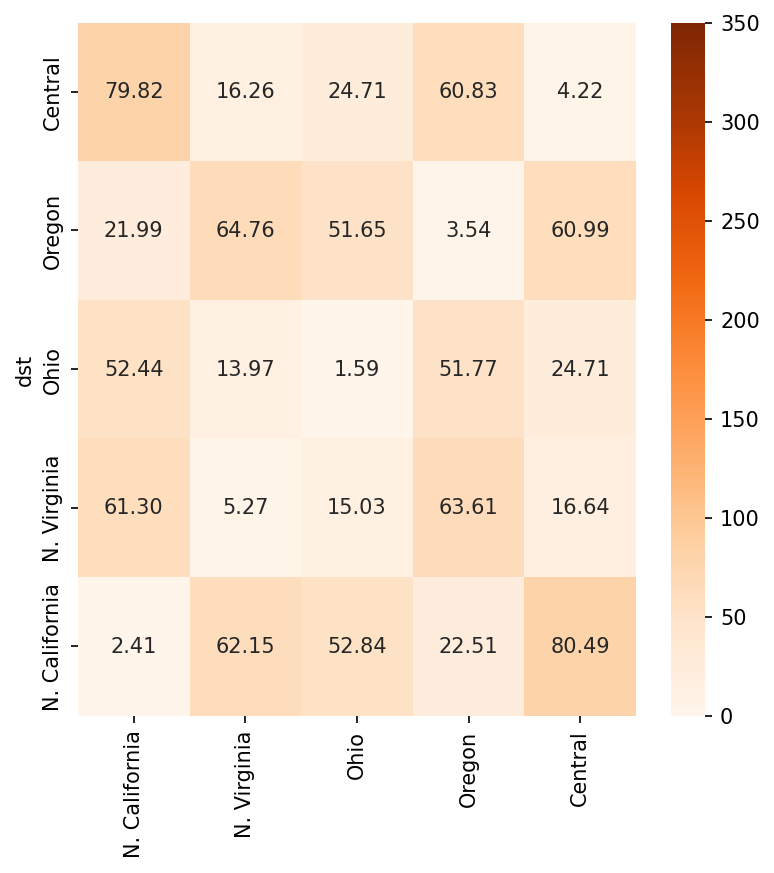

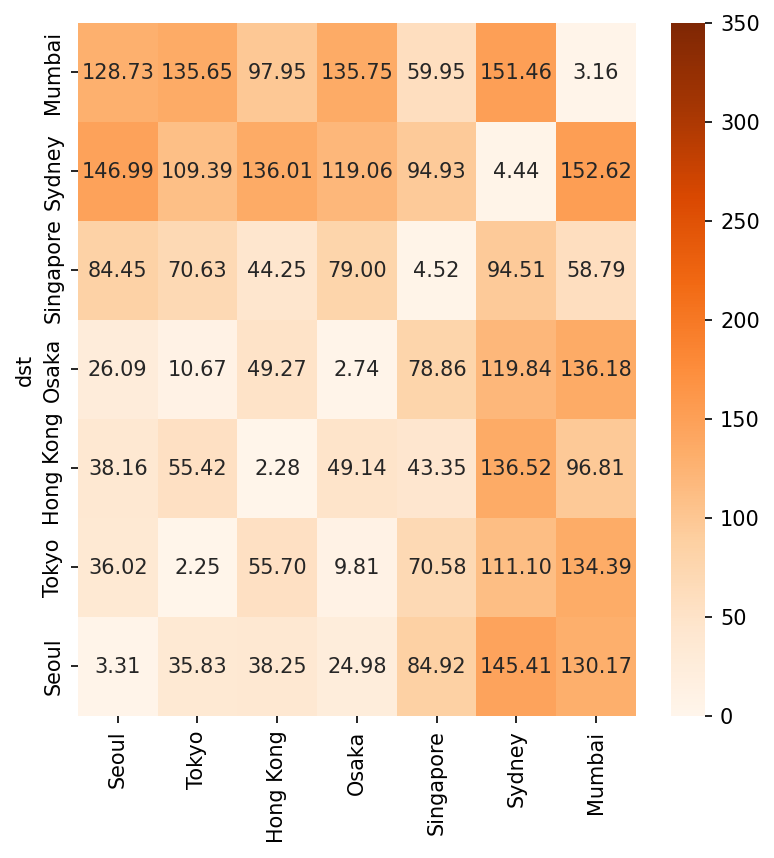

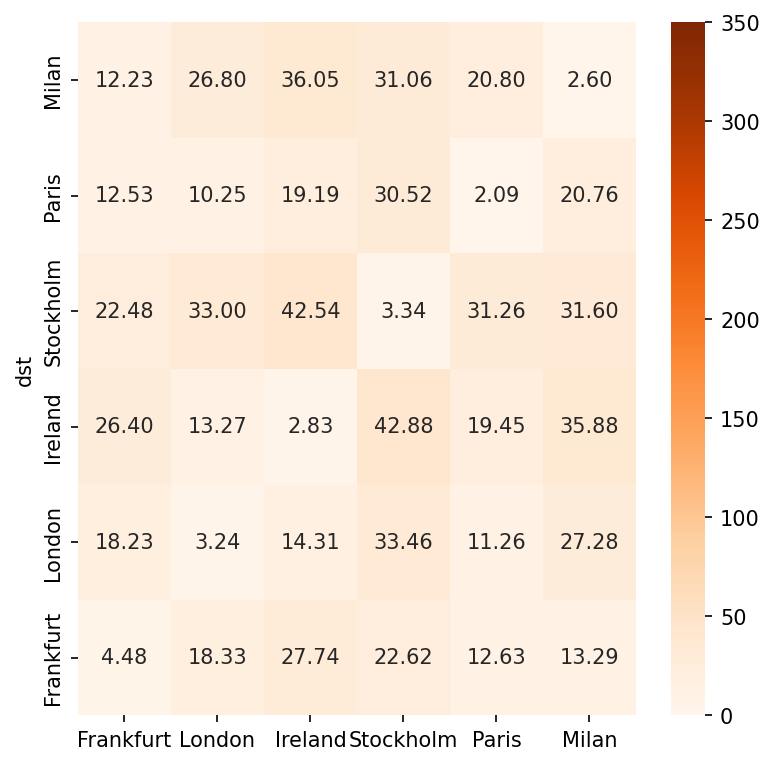

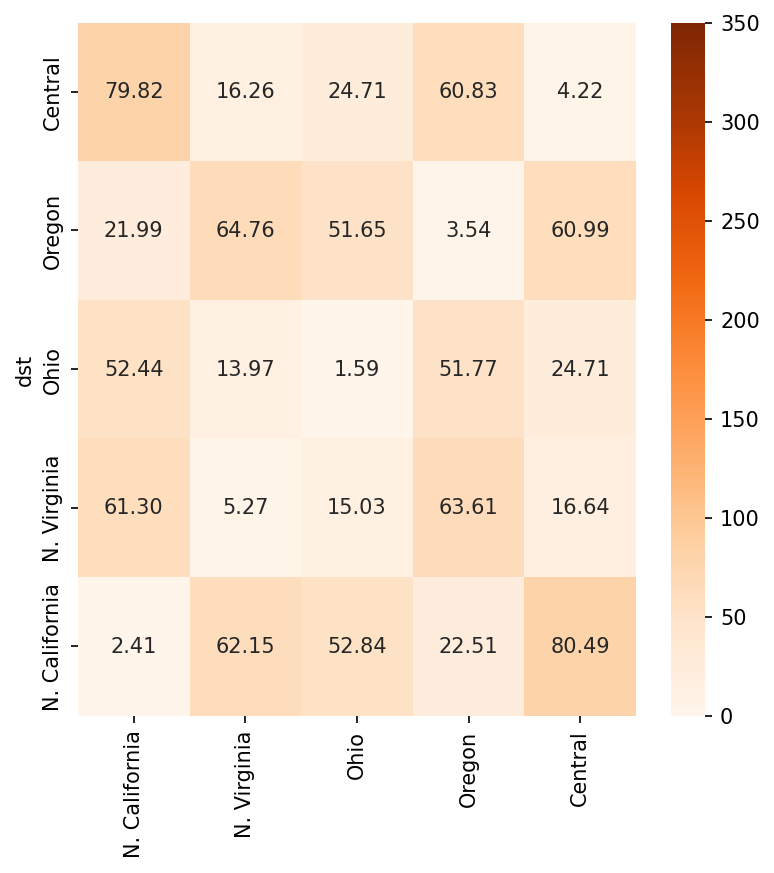

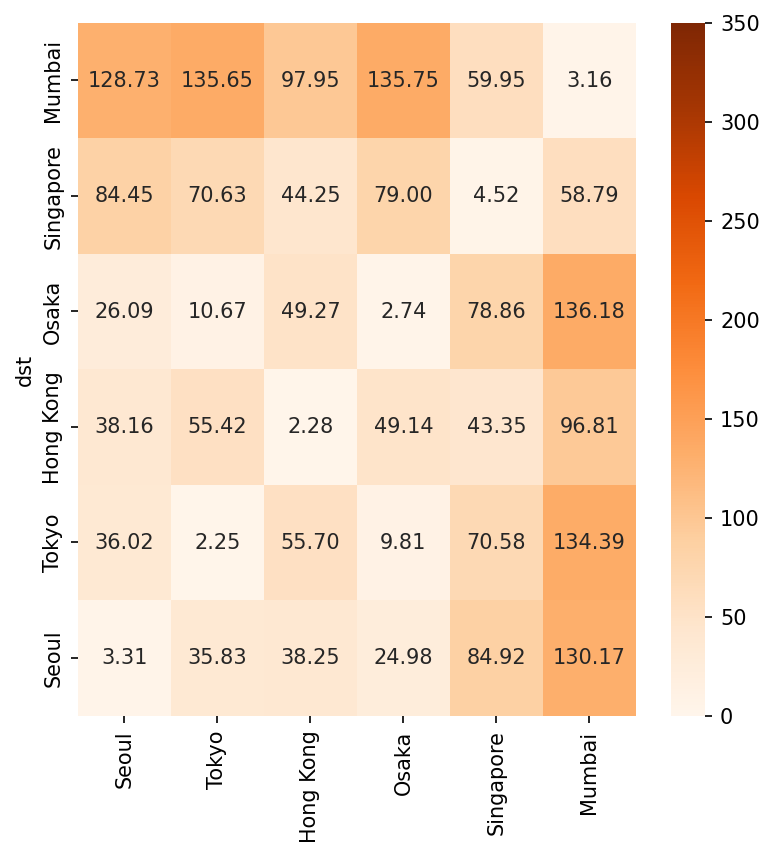

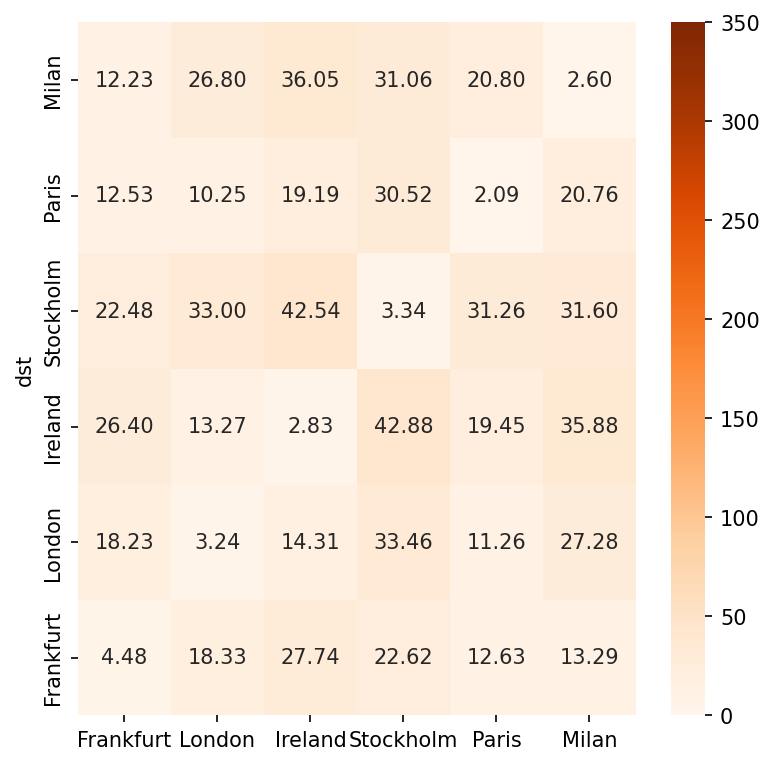

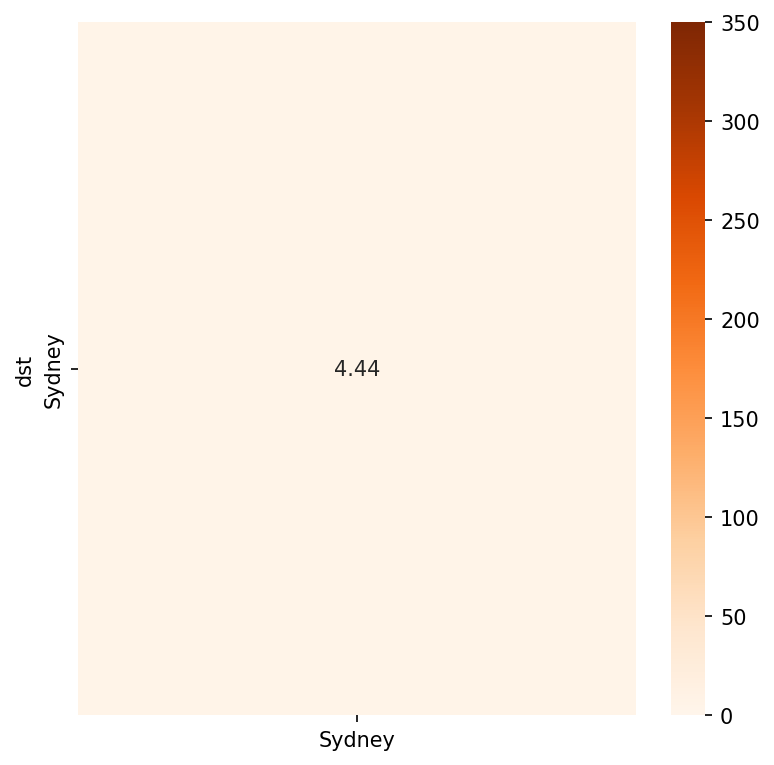

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import numpy as np
plt.rcParams['figure.dpi'] = 150

# Load the CSV file
file_path = './aws_crossregion_latency.csv'
df = pd.read_csv(file_path, index_col=0)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 11)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(scaled_data)
    distortions.append(sum(np.min(cdist(
        scaled_data, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

# Plot the elbow graph
plt.figure(figsize=(4, 3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.show()

# Run KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_3'] = kmeans_3.fit_predict(scaled_data)

# Run KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(scaled_data)

# Get cluster lists
cluster_3_groups = df.groupby('Cluster_3').apply(
    lambda x: list(x.index)).to_dict()
cluster_4_groups = df.groupby('Cluster_4').apply(
    lambda x: list(x.index)).to_dict()


def plot_cluster_heatmap(df, cluster_column, cluster_groups, title_prefix):
    for cluster_id, regions in cluster_groups.items():
        plt.figure(figsize=(6, 6))
        reversed_df = df.loc[regions, regions[::-1]]
        sns.heatmap(reversed_df, annot=True,
                    fmt=".2f", cmap="Oranges", vmin=0, vmax=350)

        # plt.title(f"{title_prefix} Cluster {cluster_id} Heatmap")
        plt.show()


display(cluster_3_groups)

plt.figure(figsize=(14, 14))
sns.heatmap(df.iloc[:, :-2], annot=True, fmt=".2f",
            cmap="Oranges", vmin=0, vmax=350)
plt.title('AWS Cross Region Latency Heatmap Without Clustering')
plt.show()


# Plot heatmaps for k=3
plot_cluster_heatmap(df.iloc[:, :-2], 'Cluster_3', cluster_3_groups, 'k=3')
plot_cluster_heatmap(df.iloc[:, :-2], 'Cluster_4', cluster_4_groups, 'k=4')